# Specific Energy

The height of the energy grade line (EGL) above the channel bottom is the formal definition of this concept.

> From pg. 19 Sturm
>![](specificNRG-define.png)

A skecth showing the relationship(s) of various common hydraulic components is

![](specificNRG-drawing.png)

where, <br> 
- $z$ is the elevation of the channel bottom above some datum (or the thalweg point), <br>
- $y$ is the flow depth, and <br> 
- $\frac{\alpha V^2}{2g}$ is the velocity head (with kinetic energy correction term).

## Applications

The specific energy concept is useful in gradually varied flow calculations end even forms one algorithm to compute (predict) the location of the free surface. It is also vital in determining the flow regime (subcritical ,supercritical, and critical).

Another use is in the analysis and design of transitions (to connect different channel geometries in engineered channels).  

## Example 1.  Flow over a step

A classic example being the estimation of flow depth over a step in a channel (or sand bar, or spread footing ...)

![](channelstep.png)

In the drawing above the EGL is horizontal, so there is no head loss.   The total energy at the two sections is the same.  If we write the energy equation for the two sections we have:

$$ y_1 + \frac{\alpha V_1^2}{2g} + z_1 = y_2 + \frac{\alpha V_2^2}{2g} + z_2 + h_{L;1->2}$$

The last term is zero (it is the slope of the EGL multiplied by the horizontal distance from section 1 to 2), if we express the channel elevations in terms of the approach depth we have

$$ y_1 + \frac{\alpha V_1^2}{2g} + z_1 = y_2 + \frac{\alpha V_2^2}{2g} + (z_1+\Delta z) $$

Subtract the approach elevation from both sides

$$ y_1 + \frac{\alpha V_1^2}{2g}  = y_2 + \frac{\alpha V_2^2}{2g} + \Delta z $$

Expressed in a discharge form

$$ y_1 + \frac{\alpha Q^2}{2gA_1^2}  = y_2 + \frac{\alpha Q^2}{2gA_2^2} + \Delta z $$

Assuming a recrangular channel

$$ y_1 + \frac{\alpha Q^2}{2g B^2 y_1^2}  = y_2 + \frac{\alpha Q^2}{2g B^2 y_2^2} + \Delta z $$

Then knowing $Q$, $\Delta z$, $B$, and $y_1$ we can solve for $y_2$

One could either be elegant, or just brute force an answer.

Below we will try for elegant, rearrange into

$$ f(y_2) =  y_2 + \frac{\alpha Q^2}{2g B^2 y_2^2} + \Delta z  - (y_1 + \frac{\alpha Q^2}{2g B^2 y_1^2}) $$

and use a numerical method to find values that make $f(y_2)=0$ (the equation is a cubic, so as many as three are anticipated)

In [1]:
# Find y2 given y1, B, Q, deltaz
deltaz = 0.1 #m zero means no step
B = 1.0  #m
y1 = 1.0 #m
Q = 1.0  #m^3/s
g = 9.81 #m/s^2
y2 = 0.0 #m initial guess

def spNRG(y,width,discharge,gravity): #specific energy in a rectangular channel
    numerator=discharge**2
    denominator=(2.0*gravity)*(width**2)*(y**2)
    if denominator == 0.0: #probably depth is zero
        raise Exception("divide by zero, check your inputs dumbass!")
    spNRG=numerator/denominator + y
    return(spNRG)

def func(y1,y2,width,discharge,gravity,deltaz): #our function to find zeros
    func = spNRG(y2,width,discharge,gravity) + deltaz - spNRG(y1,width,discharge,gravity)
    return(func)

In [2]:
# Set-up a bisection-type solver
howmany = 25 # number of iterations
clow = 0.5 # lower limit for y2
chigh = 1.5 # upper limit for y2
dtrue = 0 # ground truth value
tol = 1e-6 # desired accuracy

import numpy # useful library with absolute value and sign functions

############ Learning Phase ################
# check if clow and chigh bound a solution
if numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue):
    raise Exception("The scalars clow and chigh do not bound a solution")

for iteration in range(howmany):  

# get midpoint
    m = (clow + chigh)/2

    if numpy.abs(func(y1,m,B,Q,g,deltaz)) < tol:
        # stopping condition, report m as root
        print('y2 = ',round(m,3),"f(y2)=",round(func(y1,m,B,Q,g,deltaz),3))
        break
    elif numpy.sign(func(y1,clow,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        clow = m # update clow with m
    elif numpy.sign(func(y1,chigh,B,Q,g,deltaz)-dtrue) == numpy.sign(func(y1,m,B,Q,g,deltaz)-dtrue):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        chigh = m # update chigh with m
####################################################

y2 =  0.886 f(y2)= 0.0


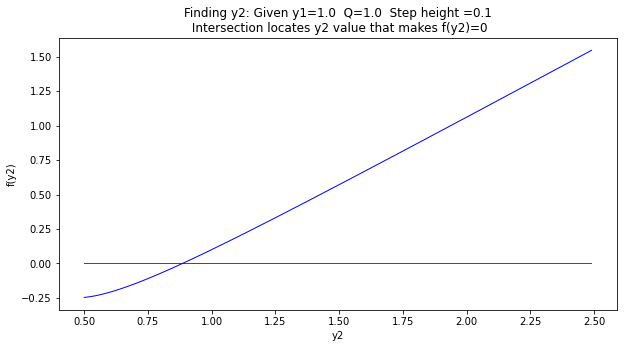

In [3]:
# Or make a graph and read from a prot
y2list = []
f2list = []
startguess = 0.5
for i in range(200):
    guess = startguess + float(i)*0.01
    y2list.append(guess)
    f2list.append(func(y1,guess,B,Q,g,deltaz))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Finding y2: Given y1=' + str(y1) + '  Q=' + str(Q) + '  Step height ='+str(deltaz) + '\n Intersection locates y2 value that makes f(y2)=0'
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([y2list[0],y2list[-1]], [0,0], c='red',linewidth=1) 
plt.plot(y2list, f2list, c='blue',linewidth=1)
plt.xlabel('y2')
plt.ylabel('f(y2)')
plt.title(plottitle)
plt.show()

One can easily modify the script for the case where the head loss is non-zero.  

The equation in that case is

$$ f(y_2) =  y_2 + \frac{\alpha Q^2}{2g B^2 y_2^2} + \Delta z  + (h_{L;1->2}) - (y_1 + \frac{\alpha Q^2}{2g B^2 y_1^2}) $$

Variations on this approach are the basis of specific energy solutions to open channel hydraulics problems.

The book provides guidance that use of the channel bottom as the datum should be limited to cases with slopes smaller than 6$^o$, greater slopes would require some consideration of the departure of streamlines from the horizontal to account for flow depth being perpindicular to the bottom, but the distances being strictly vertical in the above formulations.

![](limitslope.png)

## Specific Energy Diagram

The plot of depth versus specific energy in a particular channel is the specific energy diagram.  Typically the discharge per unit width is used to define the velocity $\frac{Q}{T} = q$  and  $V= \frac{q}{y}$.

![](specificNRG-diagram.png)

we can use our functions above to make our own diagram

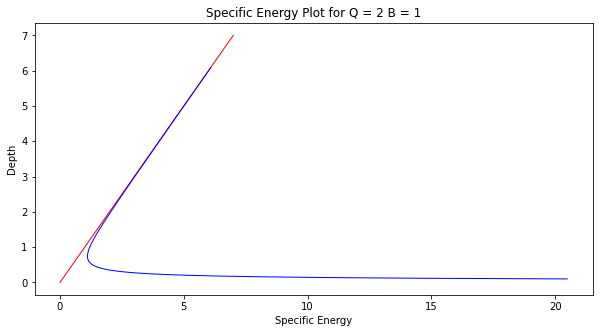

In [4]:
# Or make a graph and read from a prot
Q = 2
B = 1
g = 9.81
ylist = []
Elist = []
startvalue = 0.1
for i in range(600):
    guess = startvalue + float(i)*0.01
    ylist.append(guess)
    Elist.append(spNRG(guess,B,Q,g))
import matplotlib.pyplot as plt # the python plotting library
plottitle ='Specific Energy Plot for Q = ' + str(Q) + ' B = ' + str(B)
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot([0,7], [0,7], c='red',linewidth=1) 
plt.plot(Elist, ylist, c='blue',linewidth=1)
plt.xlabel('Specific Energy')
plt.ylabel('Depth')
plt.title(plottitle)
plt.show()

## Choke

A limiting condition for the step in a channel occurs when $\Delta z$ is larger than $\Delta z_c$, which is the difference between the approach specific energy and the minimum specific energy.  

For an approach energy $E_1$

$$ E_1 =  y_1 + \frac{ Q^2}{2g B^2 y_1^2}  $$

If the step height $\Delta z$ is larger than the energy difference from approach to critical

$$ \Delta z > E_1 - E_{min} =  y_1 + \frac{ Q^2}{2g B^2 y_1^2} - (y_c + \frac{ Q^2}{2g B^2 y_c^2}) $$

then the condition is called choking (or throttling) and the depth upstream of the choke must rise to maintain enough energy for the depth over the step to be at least at critical depth.




## Examples

## References